#  Packages

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import pickle


# Load và xem dữ liệu

In [2]:
full_data = pd.read_csv('amazon.csv')
print("Kích thước dữ liệu ban đầu:", full_data.shape)
full_data.head()

Kích thước dữ liệu ban đầu: (1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Loại bỏ các cột không cần thiết

In [4]:
columns_to_drop = [
    'discounted_price', 'actual_price', 'discount_percentage',
    'about_product', 'user_name', 'review_id', 'review_title',
    'review_content'
]

data = full_data.drop(columns=columns_to_drop)
print("\nKích thước dữ liệu sau khi loại bỏ các cột:", data.shape)
data.head()


Kích thước dữ liệu sau khi loại bỏ các cột: (1465, 8)


,product_id,product_name,category,rating,rating_count,user_id,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Kiểm tra phân phối rating

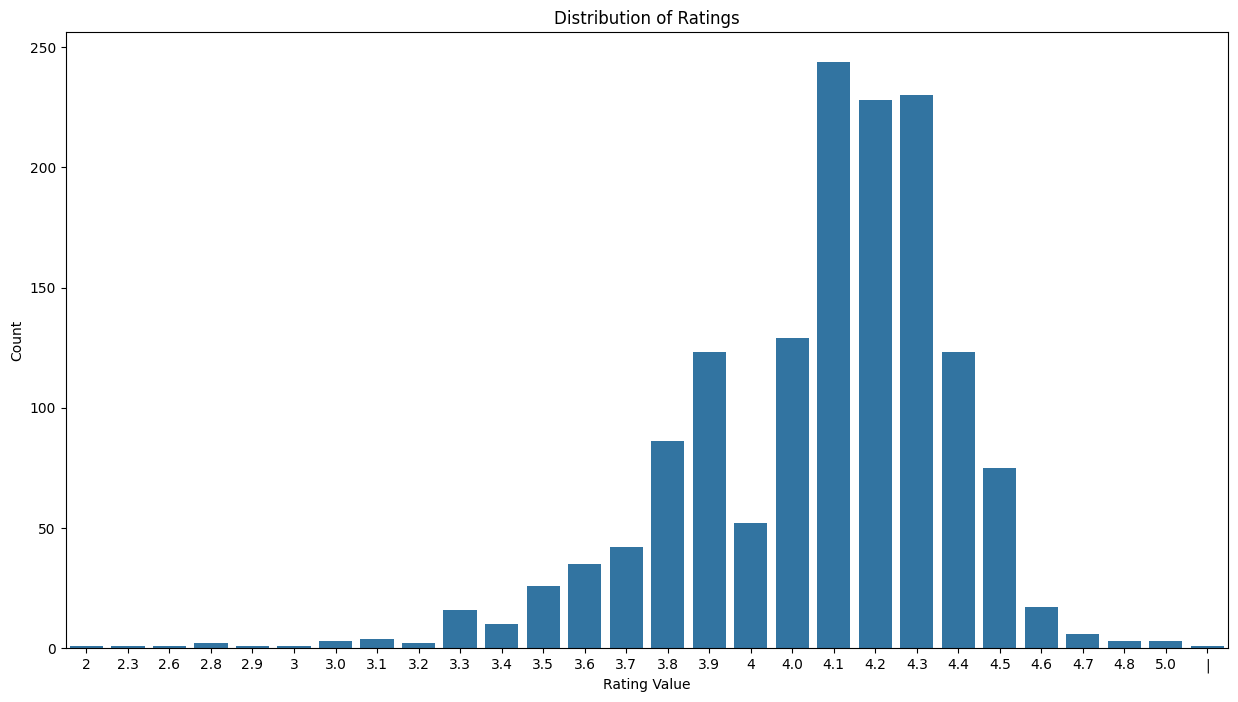


Thông tin dữ liệu sau khi xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1462 non-null   int32  
 1   product_name  1462 non-null   object 
 2   category      1462 non-null   object 
 3   rating        1462 non-null   float64
 4   rating_count  1462 non-null   object 
 5   user_id       1462 non-null   int32  
 6   img_link      1462 non-null   object 
 7   product_link  1462 non-null   object 
dtypes: float64(1), int32(2), object(5)
memory usage: 91.4+ KB
None


In [5]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data.sort_values(by='rating'), x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.show()

# %%
# Xử lý dữ liệu
data = data.dropna()
data = data[data.rating != '|']
data['rating'] = data['rating'].astype(float)

# Encode user_id và product_id
product_id_encoder = LabelEncoder()
user_id_encoder = LabelEncoder()

data['product_id'] = product_id_encoder.fit_transform(data['product_id'])
data['user_id'] = user_id_encoder.fit_transform(data['user_id'])

print("\nThông tin dữ liệu sau khi xử lý:")
print(data.info())

# Deep Matrix Factorization Model

In [6]:
class DeepMatrixFactorization(nn.Module):
    def __init__(self, n_users, n_items, factors=[64, 32, 16, 8]):
        super(DeepMatrixFactorization, self).__init__()
        
        # Embedding layers
        self.user_embedding = nn.Embedding(n_users, factors[0])
        self.item_embedding = nn.Embedding(n_items, factors[0])
        
        # User tower
        self.user_tower = nn.Sequential(
            nn.Linear(factors[0], factors[1]),
            nn.ReLU(),
            nn.BatchNorm1d(factors[1]),
            nn.Dropout(0.2),
            nn.Linear(factors[1], factors[2]),
            nn.ReLU(),
            nn.BatchNorm1d(factors[2]),
            nn.Dropout(0.2),
            nn.Linear(factors[2], factors[3])
        )
        
        # Item tower
        self.item_tower = nn.Sequential(
            nn.Linear(factors[0], factors[1]),
            nn.ReLU(),
            nn.BatchNorm1d(factors[1]),
            nn.Dropout(0.2),
            nn.Linear(factors[1], factors[2]),
            nn.ReLU(),
            nn.BatchNorm1d(factors[2]),
            nn.Dropout(0.2),
            nn.Linear(factors[2], factors[3])
        )
        
        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
                    
    def forward(self, user_ids, item_ids):
        # Get embeddings
        user_embedded = self.user_embedding(user_ids)
        item_embedded = self.item_embedding(item_ids)
        
        # Pass through towers
        user_vector = self.user_tower(user_embedded)
        item_vector = self.item_tower(item_embedded)
        
        # Normalize embeddings
        user_vector = nn.functional.normalize(user_vector, p=2, dim=1)
        item_vector = nn.functional.normalize(item_vector, p=2, dim=1)
        
        # Compute prediction
        prediction = torch.sum(user_vector * item_vector, dim=1)
        return torch.sigmoid(prediction)

# Training Framework

In [16]:
class DMFTrainer:
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        self.criterion = nn.BCELoss()
        
    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0
        
        for batch in tqdm(train_loader, desc="Training"):
            user_ids, item_ids, ratings = batch
            
            # Forward pass
            predictions = self.model(user_ids, item_ids)
            loss = self.criterion(predictions, ratings)
            
            # Accuracy
            predicted_labels = (predictions >= 0.5).float()
            correct_predictions += (predicted_labels == ratings).sum().item()
            total_samples += ratings.size(0)
            
            # Backward pass
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            total_loss += loss.item()
            
        return total_loss / len(train_loader), correct_predictions / total_samples

    def evaluate(self, val_loader):
        self.model.eval()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0
        
        with torch.no_grad():
            for batch in val_loader:
                user_ids, item_ids, ratings = batch
                predictions = self.model(user_ids, item_ids)
                loss = self.criterion(predictions, ratings)
                
                predicted_labels = (predictions >= 0.5).float()
                correct_predictions += (predicted_labels == ratings).sum().item()
                total_samples += ratings.size(0)
                
                total_loss += loss.item()
                
        return total_loss / len(val_loader), correct_predictions / total_samples

# Dataset

In [15]:
class RecommenderDataset(torch.utils.data.Dataset):
    def __init__(self, df, rating_range=5.0):
        self.users = torch.LongTensor(df['user_id'].values)
        self.items = torch.LongTensor(df['product_id'].values)
        self.ratings = torch.FloatTensor(df['rating'].values) / rating_range
        
    def __len__(self):
        return len(self.users)
        
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.ratings[idx]

# Split data

In [9]:
Train, Test = train_test_split(data, test_size=0.2, random_state=42)
print("Train size:", len(Train))
print("Test size:", len(Test))

Train size: 1169
Test size: 293


# Create datasets and dataloaders

In [14]:
train_dataset = RecommenderDataset(Train)
test_dataset = RecommenderDataset(Test)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=128
)

# Initialize and train model

In [11]:
n_users = len(data['user_id'].unique())
n_items = len(data['product_id'].unique())
model = DeepMatrixFactorization(n_users, n_items)
trainer = DMFTrainer(model)

# Training loop

In [12]:
num_epochs = 50
train_losses = []
test_losses = []
train_accs = []
test_accs = []

print("Starting training...")
for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = trainer.train_epoch(train_loader)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Evaluate
    test_loss, test_acc = trainer.evaluate(test_loader)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
    if (epoch + 1) % 5 == 0:
        print(f'\nEpoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
        print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Starting training...


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 72.26it/s]



Epoch [5/50]
Train Loss: 0.6832, Train Accuracy: 0.0009
Test Loss: 0.7001, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 57.39it/s]



Epoch [10/50]
Train Loss: 0.6600, Train Accuracy: 0.0017
Test Loss: 0.6791, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 88.01it/s]



Epoch [15/50]
Train Loss: 0.6429, Train Accuracy: 0.0017
Test Loss: 0.6560, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 71.09it/s]



Epoch [20/50]
Train Loss: 0.6167, Train Accuracy: 0.0009
Test Loss: 0.6367, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 85.03it/s]



Epoch [25/50]
Train Loss: 0.6043, Train Accuracy: 0.0017
Test Loss: 0.6141, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 85.03it/s]



Epoch [30/50]
Train Loss: 0.5796, Train Accuracy: 0.0017
Test Loss: 0.5875, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 78.34it/s]



Epoch [35/50]
Train Loss: 0.5562, Train Accuracy: 0.0017
Test Loss: 0.5676, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 86.50it/s]



Epoch [40/50]
Train Loss: 0.5463, Train Accuracy: 0.0017
Test Loss: 0.5471, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.56it/s]



Epoch [45/50]
Train Loss: 0.5308, Train Accuracy: 0.0017
Test Loss: 0.5332, Test Accuracy: 0.0000


Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 77.78it/s]



Epoch [50/50]
Train Loss: 0.5213, Train Accuracy: 0.0017
Test Loss: 0.5237, Test Accuracy: 0.0000


# Plot training results

In [13]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

# Plot Loss

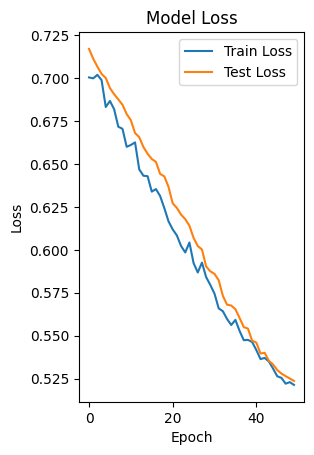

In [17]:
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy

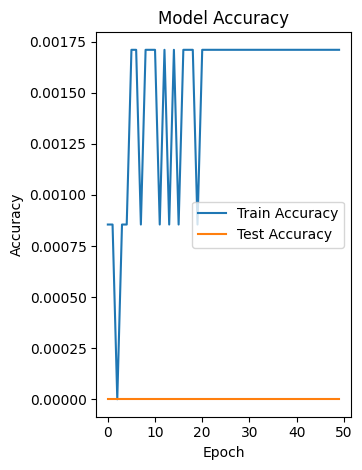

In [18]:
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save model and training info

In [19]:
save_info = {
    'model_state_dict': model.state_dict(),
    'train_losses': train_losses,
    'test_losses': test_losses,
    'train_accs': train_accs,
    'test_accs': test_accs,
    'n_users': n_users,
    'n_items': n_items,
    'user_encoder': user_id_encoder,
    'product_encoder': product_id_encoder
}

with open('dmf_model.pkl', 'wb') as f:
    pickle.dump(save_info, f)
print("\nModel saved to dmf_model.pkl")


Model saved to dmf_model.pkl


# Get recommendations with details

In [20]:
def get_recommendations_with_details(model=model, data=data, n_recommendations=5, product_id=0):
    """Get recommendations for a product"""
    model.eval()
    with torch.no_grad():
        # Get original product ID
        original_product_id = product_id_encoder.inverse_transform([product_id])[0]
        
        # Get all product embeddings
        all_products = torch.arange(len(data['product_id'].unique()))
        target_product = torch.tensor([product_id])
        
        # Get predictions
        similarities = model(
            target_product.repeat(len(all_products)), 
            all_products
        ).numpy()
        
        # Get top recommendations
        top_indices = np.argsort(similarities)[-n_recommendations-1:][::-1]
        # Remove the input product if it's in the recommendations
        top_indices = top_indices[top_indices != product_id][:n_recommendations]
        
        recommendations = []
        for idx in top_indices:
            recommended_original_id = product_id_encoder.inverse_transform([idx])[0]
            recommended_product_details = full_data[full_data['product_id'] == recommended_original_id].iloc[0]
            
            recommendation_info = {
                'product_id': recommended_original_id,
                'product_name': recommended_product_details['product_name'],
                'category': recommended_product_details['category'],
                'rating': recommended_product_details['rating'],
                'rating_count': recommended_product_details['rating_count'],
                'img_link': recommended_product_details['img_link'],
                'product_link': recommended_product_details['product_link'],
                'similarity': similarities[idx]
            }
            recommendations.append(recommendation_info)
            
    return recommendations

# Example usage

In [21]:
if __name__ == "__main__":
    # Load model and make recommendations
    recommendations = get_recommendations_with_details(model, data, 5, 21)
    
    # Print recommendations
    print("\nRecommendations:")
    for i, rec in enumerate(recommendations, 1):
        print(f"\nRecommendation {i}:")
        print(f"Product Name: {rec['product_name']}")
        print(f"Category: {rec['category']}")
        print(f"Rating: {rec['rating']} ({rec['rating_count']} ratings)")
        print(f"Similarity Score: {rec['similarity']:.4f}")


Recommendations:

Recommendation 1:
Product Name: Portronics Ruffpad 15 Re-Writable LCD Screen 38.1cm (15-inch) Writing Pad for Drawing, Playing, Handwriting Gifts for Kids & Adults (Grey)
Category: OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries
Rating: 4.3 (3,530 ratings)
Similarity Score: 0.7279

Recommendation 2:
Product Name: Amazon Brand - Solimo 2000/1000 Watts Room Heater with Adjustable Thermostat (ISI certified, White colour, Ideal for small to medium room/area)
Category: Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters
Rating: 4 (18,543 ratings)
Similarity Score: 0.7273

Recommendation 3:
Product Name: Samsung EVO Plus 128GB microSDXC UHS-I U3 130MB/s Full HD & 4K UHD Memory Card with Adapter (MB-MC128KA), Blue
Category: Electronics|Accessories|MemoryCards|MicroSD
Rating: 4.3 (1,40,036 ratings)
Similarity Score: 0.7250

Recommendation 4:
Product Name: !!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in